# INFO 208 Lab Exploration (Zhaohua Huang)

In this practical lab exploration for wordcount by using python 3,
I'm using NLTK package to finish all text manipulations including:
filter puncuation, stopwords, lowercase text and stem the text.
The python code idea are from Jason Brownlee on [Machine Learning Mastery](https://machinelearningmastery.com/clean-text-machine-learning-python/) and [NLTK website](https://www.nltk.org/api/nltk.html).

### Load Data

**US constitution** is downloaded from [usconstitution.net](https://www.usconstitution.net/const.txt). The text file is saved as 'US Constitution.txt' in the same directory of this jupter file.

In [1]:
# Load the data
filename='US Constitution.txt'
file=open(filename,'rt')
text=file.read()
file.close()

### Split into Words

NLTK provide word_tokenize() function for splitting string into tokens

It splits tokens based on white space and puctuation. Contractions are 
split apart. For example, state's is split as 'state' and ''s'.

In [2]:
#split into words
from nltk.tokenize import word_tokenize
tokens=word_tokenize(text)

### Convert to Lowercase

In [3]:
tokens=[w.lower() for w in tokens]

### Remove Punctuation

we can literate token by using python functon **.isalpha** to keep all the tokens that
are all alphbetic.

In [4]:
words=[word for word in tokens if word.isalpha()]

### Remove Stop Words

NLTK provides a list of stop words in different languages, such as 'english'.
If we want to add more into this list, we can use **stop_words.update()** function.
(Since I want to keep my results the same as pig latin wordcount, in the code part,
I use comments to show how to do it)

In [5]:
#filter out stop words
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
#updates stop words, add more into list of stop_words
#stop_words.update(['states','shall','united','state',\
                   #'may','one','time','within',\
                   #'two','http'])
words=[w for w in words if not w in stop_words]

In [6]:
print(stop_words)

{'isn', 'her', 'all', "you'll", 'further', 'so', 'over', 'hadn', 'through', 'your', 'don', 'by', 'between', 'when', 'where', 'against', 'if', 'below', 'how', 'its', 'been', 'a', 'or', 'some', 'on', 'weren', 'which', 'because', 't', 'off', 'yourself', 'those', 'won', 'our', 'both', 'own', "haven't", 'just', 'ours', 'wouldn', "you're", 'yours', 'for', 'did', 'to', 'hasn', 'yourselves', 'during', 'no', 'then', 've', 'the', "that'll", 'were', 'from', 'who', 'shan', 'again', 'wasn', "wasn't", 'than', 'out', 'him', 'what', 'that', "couldn't", 'more', "hasn't", 'didn', 'couldn', "needn't", 'my', 'having', 'd', 'me', "you'd", 'their', 'now', 'll', 'can', 'ain', 'be', 'hers', 'itself', "don't", 'they', 'while', 'only', 'mustn', 'of', "you've", 'have', 'being', 'at', 'shouldn', 'm', 'before', 'and', 'you', 'it', 'has', 'does', 'after', "she's", 're', "hadn't", 'very', 'with', 'each', 'these', 'o', "doesn't", 'needn', "it's", 'why', "weren't", "mightn't", 'into', 'here', 'doesn', 'other', "wouldn

### Count Frequency

NLTK provides class **FreDist** to calculate words' frequencies. It returns a dictonary, where keys are words in the text and values are the frequecies associated that word.

In [7]:
# calcualte frequency 
import nltk
from nltk.probability import FreqDist
def frequency(text):
    fdist=nltk.FreqDist(text)
    for word, frequency in fdist.most_common(20):
        print(f'{word}:{frequency}')
frequency(words)

shall:306
states:129
president:109
united:85
state:79
congress:60
may:44
law:39
office:37
amendment:35
person:34
house:33
representatives:29
article:28
senate:28
one:27
constitution:26
number:25
vice:24
section:22


### Install and Display Wordcloud

Wordcloud is a popular way to display the importance of words in a collection of texts. Python library has build-in word cloud package that we can call directly. The only required argument for wordcloud object is the text, since I break the text into words in previous steps, here I use **' '.join(text)** to join words with space into text.

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


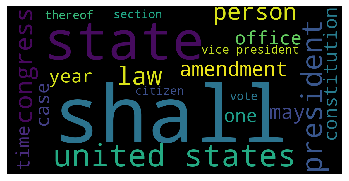

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud(text):
    wc=WordCloud(background_color='black',stopwords=stop_words,\
             max_words=20,width=400,height=200, scale=3,
             random_state=1).generate(' '.join(text))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
wordcloud(words)

### Stemming the Text

NLTK provides class **PorterStemmer** for stemming text, this is a popular and long-standing stemming algorithms method. But the results seemed a little wired: 'president' turns into 'presid', 'libertity' turns to 'liberti' and ect. So I computer stemmed text frequencies and wordcloud as comparisons with non-stemmed text.

In [10]:
#stemming of words
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
stemmed=[porter.stem(word) for word in words]
print(stemmed[:100])

['provid', 'note', 'repeal', 'text', 'note', 'version', 'spell', 'error', 'correct', 'version', 'uncorrect', 'annot', 'version', 'constitut', 'visit', 'http', 'peopl', 'unit', 'state', 'order', 'form', 'perfect', 'union', 'establish', 'justic', 'insur', 'domest', 'tranquil', 'provid', 'common', 'defenc', 'promot', 'gener', 'welfar', 'secur', 'bless', 'liberti', 'poster', 'ordain', 'establish', 'constitut', 'unit', 'state', 'america', 'articl', 'section', 'legisl', 'power', 'herein', 'grant', 'shall', 'vest', 'congress', 'unit', 'state', 'shall', 'consist', 'senat', 'hous', 'repres', 'section', 'hous', 'repres', 'shall', 'compos', 'member', 'chosen', 'everi', 'second', 'year', 'peopl', 'sever', 'state', 'elector', 'state', 'shall', 'qualif', 'requisit', 'elector', 'numer', 'branch', 'state', 'legislatur', 'person', 'shall', 'repres', 'shall', 'attain', 'age', 'twenti', 'five', 'year', 'seven', 'year', 'citizen', 'unit', 'state', 'shall', 'elect', 'inhabit']


In [11]:
frequency(stemmed)

shall:306
state:210
presid:110
unit:85
congress:60
offic:57
law:52
senat:49
person:49
may:44
hous:41
amend:38
vote:37
power:35
repres:35
year:33
constitut:31
articl:29
number:29
elect:27


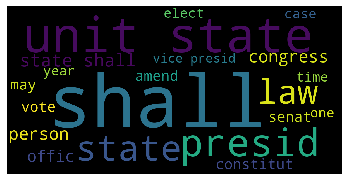

In [12]:
wordcloud(stemmed)